# TASK 1

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, matthews_corrcoef


In [ ]:

data = pd.read_csv('wdbc.data', header=None)
print("Dataset shape:", data.shape)
print("\nDataset Head:")
print(data.head())

Dataset shape: (569, 32)

Dataset Head:
         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.46

In [ ]:

feature_names = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean',
    'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]
column_names = ['ID', 'Diagnosis'] + feature_names
data.columns = column_names

In [ ]:

print("\nDataset Overview:")
print(data.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimet

In [ ]:

data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

In [ ]:

data.drop(['ID'], axis=1, inplace=True)

In [ ]:

data = data.apply(pd.to_numeric, errors='coerce')

In [ ]:

missing_values_before = data.isnull().sum().sum()
print(f"\nMissing Values Before Cleaning: {missing_values_before}")


Missing Values Before Cleaning: 0


In [ ]:

data.fillna(data.mean(), inplace=True)

In [ ]:

missing_values_after = data.isnull().sum().sum()
print(f"Missing Values After Cleaning: {missing_values_after}")

Missing Values After Cleaning: 0


In [ ]:

X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

In [ ]:

nan_in_y = y.isnull().sum()
print(f"NaN in y: {nan_in_y}")

if nan_in_y > 0:
    print("There are NaN values in the target variable y. Please check the data.")
else:
    print("No NaN values in y. Proceeding with model training.")

NaN in y: 0
No NaN values in y. Proceeding with model training.


In [ ]:

kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [ ]:

metrics_dict = {
    'Model': [],
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'False Discovery Rate': [],
    'False Omission Rate': [],
    'Matthews Correlation Coefficient': []
}


In [ ]:

def compute_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2,2):
        tn, fp, fn, tp = cm.ravel()
    else:
        tn, fp, fn, tp = 0,0,0,0
        if 0 in y_true.unique() and 0 in y_pred.unique():
            tn = cm[0,0]
            fp = cm[0,1] if cm.shape[1] >1 else 0
        if 1 in y_true.unique() and 1 in y_pred.unique():
            tp = cm[1,1]
            fn = cm[1,0] if cm.shape[1] >1 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) >0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    fdr = fp / (fp + tp) if (fp + tp) > 0 else 0
    for_ = fn / (fn + tn) if (fn + tn) > 0 else 0
    mcc = matthews_corrcoef(y_true, y_pred) if (tp + tn + fp + fn) >0 else 0
    return accuracy, sensitivity, specificity, fdr, for_, mcc


In [ ]:

knn = KNeighborsClassifier(n_neighbors=5)
knn_accuracies, knn_sensitivities, knn_specificities, knn_fdr, knn_for, knn_mcc = [], [], [], [], [], []

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc, sen, spec, fdr, for_, mcc = compute_metrics(y_test, y_pred)
    knn_accuracies.append(acc)
    knn_sensitivities.append(sen)
    knn_specificities.append(spec)
    knn_fdr.append(fdr)
    knn_for.append(for_)
    knn_mcc.append(mcc)

    print(f"Fold {fold}: Accuracy={acc:.4f}, Sensitivity={sen:.4f}, Specificity={spec:.4f}, "
          f"FDR={fdr:.4f}, FOR={for_:.4f}, MCC={mcc:.4f}")

Fold 1: Accuracy=0.9649, Sensitivity=0.9130, Specificity=1.0000, FDR=0.0000, FOR=0.0556, MCC=0.9286
Fold 2: Accuracy=0.9298, Sensitivity=0.8421, Specificity=0.9737, FDR=0.0588, FOR=0.0750, MCC=0.8406
Fold 3: Accuracy=0.9298, Sensitivity=0.9048, Specificity=0.9444, FDR=0.0952, FOR=0.0556, MCC=0.8492
Fold 4: Accuracy=0.8772, Sensitivity=0.8235, Specificity=0.9000, FDR=0.2222, FOR=0.0769, MCC=0.7121
Fold 5: Accuracy=0.8596, Sensitivity=0.7391, Specificity=0.9412, FDR=0.1053, FOR=0.1579, MCC=0.7080
Fold 6: Accuracy=0.9298, Sensitivity=0.9583, Specificity=0.9091, FDR=0.1154, FOR=0.0323, MCC=0.8599
Fold 7: Accuracy=0.9649, Sensitivity=0.9565, Specificity=0.9706, FDR=0.0435, FOR=0.0294, MCC=0.9271
Fold 8: Accuracy=0.9649, Sensitivity=0.9412, Specificity=0.9750, FDR=0.0588, FOR=0.0250, MCC=0.9162
Fold 9: Accuracy=0.9825, Sensitivity=0.9565, Specificity=1.0000, FDR=0.0000, FOR=0.0286, MCC=0.9639
Fold 10: Accuracy=0.8929, Sensitivity=0.8182, Specificity=0.9412, FDR=0.1000, FOR=0.1111, MCC=0.7740

In [ ]:

metrics_dict['Model'].append('KNN')
metrics_dict['Accuracy'].append(np.mean(knn_accuracies))
metrics_dict['Sensitivity'].append(np.mean(knn_sensitivities))
metrics_dict['Specificity'].append(np.mean(knn_specificities))
metrics_dict['False Discovery Rate'].append(np.mean(knn_fdr))
metrics_dict['False Omission Rate'].append(np.mean(knn_for))
metrics_dict['Matthews Correlation Coefficient'].append(np.mean(knn_mcc))

In [ ]:

svm = SVC(kernel='rbf', gamma='scale')
svm_accuracies, svm_sensitivities, svm_specificities, svm_fdr, svm_for, svm_mcc = [], [], [], [], [], []

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    acc, sen, spec, fdr, for_, mcc = compute_metrics(y_test, y_pred)
    svm_accuracies.append(acc)
    svm_sensitivities.append(sen)
    svm_specificities.append(spec)
    svm_fdr.append(fdr)
    svm_for.append(for_)
    svm_mcc.append(mcc)

    print(f"Fold {fold}: Accuracy={acc:.4f}, Sensitivity={sen:.4f}, Specificity={spec:.4f}, "
          f"FDR={fdr:.4f}, FOR={for_:.4f}, MCC={mcc:.4f}")

Fold 1: Accuracy=0.9298, Sensitivity=0.8261, Specificity=1.0000, FDR=0.0000, FOR=0.1053, MCC=0.8597
Fold 2: Accuracy=0.8772, Sensitivity=0.6316, Specificity=1.0000, FDR=0.0000, FOR=0.1556, MCC=0.7303
Fold 3: Accuracy=0.9474, Sensitivity=0.9524, Specificity=0.9444, FDR=0.0909, FOR=0.0286, MCC=0.8886
Fold 4: Accuracy=0.9298, Sensitivity=0.8235, Specificity=0.9750, FDR=0.0667, FOR=0.0714, MCC=0.8296
Fold 5: Accuracy=0.8421, Sensitivity=0.6087, Specificity=1.0000, FDR=0.0000, FOR=0.2093, MCC=0.6938
Fold 6: Accuracy=0.9123, Sensitivity=0.8750, Specificity=0.9394, FDR=0.0870, FOR=0.0882, MCC=0.8196
Fold 7: Accuracy=0.9474, Sensitivity=0.8696, Specificity=1.0000, FDR=0.0000, FOR=0.0811, MCC=0.8939
Fold 8: Accuracy=0.9474, Sensitivity=0.8824, Specificity=0.9750, FDR=0.0625, FOR=0.0488, MCC=0.8729
Fold 9: Accuracy=0.9649, Sensitivity=0.9130, Specificity=1.0000, FDR=0.0000, FOR=0.0556, MCC=0.9286
Fold 10: Accuracy=0.8393, Sensitivity=0.6818, Specificity=0.9412, FDR=0.1176, FOR=0.1795, MCC=0.6617

In [ ]:

metrics_dict['Model'].append('SVM')
metrics_dict['Accuracy'].append(np.mean(svm_accuracies))
metrics_dict['Sensitivity'].append(np.mean(svm_sensitivities))
metrics_dict['Specificity'].append(np.mean(svm_specificities))
metrics_dict['False Discovery Rate'].append(np.mean(svm_fdr))
metrics_dict['False Omission Rate'].append(np.mean(svm_for))
metrics_dict['Matthews Correlation Coefficient'].append(np.mean(svm_mcc))

In [ ]:

print("\nEvaluation Metrics for KNN and SVM (10-Fold Cross Validation):")
results_df = pd.DataFrame(metrics_dict)
print(results_df)


Evaluation Metrics for KNN and SVM (10-Fold Cross Validation):
  Model  Accuracy  Sensitivity  Specificity  False Discovery Rate  \
0   KNN  0.929637     0.885331     0.955516              0.079923   
1   SVM  0.913753     0.806405     0.977501              0.042468   

   False Omission Rate  Matthews Correlation Coefficient  
0             0.064728                          0.847961  
1             0.102326                          0.817874  


# Task 3

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

data = pd.read_csv('wdbc.data', header=None)
data.columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, data.shape[1] - 1)]
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})  # Map M to 1 (Malignant) and B to 0 (Benign)
data.drop(['ID'], axis=1, inplace=True)  # Drop the ID column

In [ ]:

print("Dataset Overview:")
print(data.info())
print("\nClass Distribution:")
print(data['Diagnosis'].value_counts())
print("\nStatistical Summary:")
print(data.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Diagnosis   569 non-null    int64  
 1   Feature_1   569 non-null    float64
 2   Feature_2   569 non-null    float64
 3   Feature_3   569 non-null    float64
 4   Feature_4   569 non-null    float64
 5   Feature_5   569 non-null    float64
 6   Feature_6   569 non-null    float64
 7   Feature_7   569 non-null    float64
 8   Feature_8   569 non-null    float64
 9   Feature_9   569 non-null    float64
 10  Feature_10  569 non-null    float64
 11  Feature_11  569 non-null    float64
 12  Feature_12  569 non-null    float64
 13  Feature_13  569 non-null    float64
 14  Feature_14  569 non-null    float64
 15  Feature_15  569 non-null    float64
 16  Feature_16  569 non-null    float64
 17  Feature_17  569 non-null    float64
 18  Feature_18  569 non-null    float64
 19  Feature_19 

In [ ]:

missing_values = data.isnull().sum().sum()
print(f"\nMissing Values: {missing_values}")


Missing Values: 0


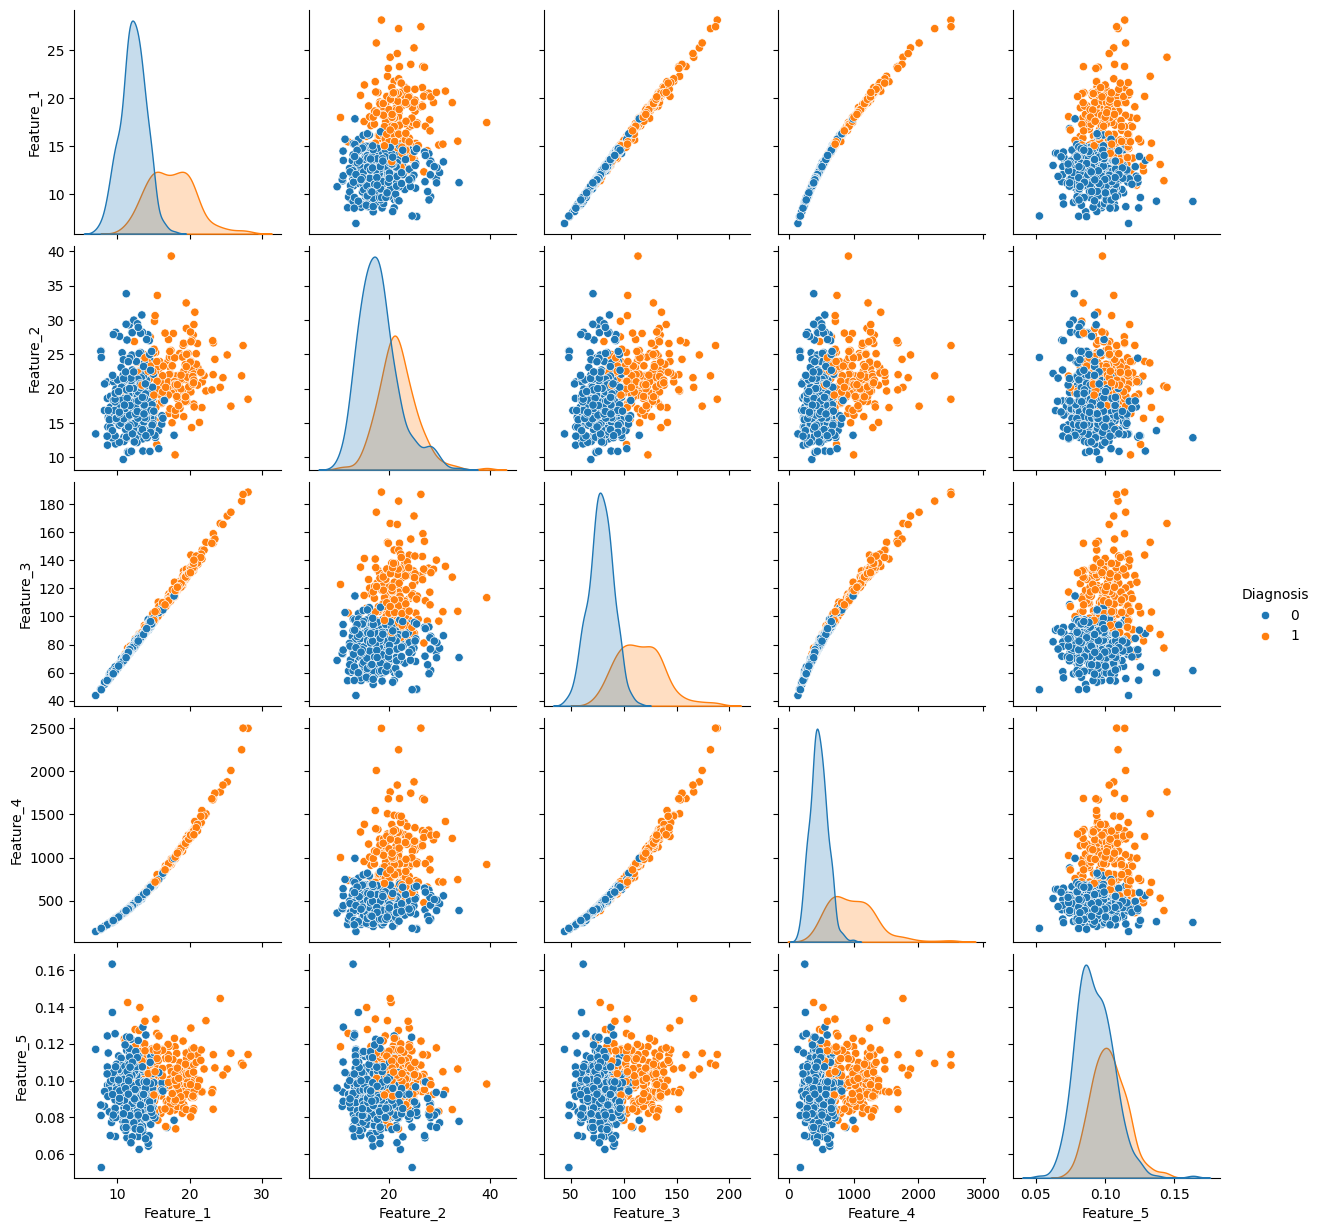

In [ ]:

sns.pairplot(data, hue='Diagnosis', vars=data.columns[1:6])

In [ ]:
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

In [ ]:

for kernel in kernels:
    print(f"\n\nTraining SVM with {kernel} kernel:")
    svc = SVC(kernel=kernel)
    svc.fit(X_train, y_train)
    print("Results with default parameters:")
    evaluate_model(svc, X_test, y_test)



Training SVM with linear kernel:
Results with default parameters:

Confusion Matrix:
[[34  0]
 [ 3 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       1.00      0.86      0.93        22

    accuracy                           0.95        56
   macro avg       0.96      0.93      0.94        56
weighted avg       0.95      0.95      0.95        56

Accuracy: 0.9464285714285714


Training SVM with poly kernel:
Results with default parameters:

Confusion Matrix:
[[32  2]
 [ 9 13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        34
           1       0.87      0.59      0.70        22

    accuracy                           0.80        56
   macro avg       0.82      0.77      0.78        56
weighted avg       0.81      0.80      0.79        56

Accuracy: 0.8035714285714286


Training SVM with rbf kernel

In [ ]:

print(f"\nHyperparameter tuning for {kernel} kernel:")
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}
grid = GridSearchCV(SVC(kernel=kernel), param_grid, refit=True, verbose=0, cv=5)
grid.fit(X_train, y_train)


Hyperparameter tuning for sigmoid kernel:


GridSearchCV(cv=5, estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]})

In [ ]:

    best_model = grid.best_estimator_
    print("Best Parameters:", grid.best_params_)
    print("Results with tuned parameters:")
    evaluate_model(best_model, X_test, y_test)

Best Parameters: {'C': 0.1, 'gamma': 1}
Results with tuned parameters:

Confusion Matrix:
[[71  0]
 [43  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114

Accuracy: 0.6228070175438597


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# TASK 2

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, matthews_corrcoef

In [ ]:

data = pd.read_csv('wdbc.data', header=None)


In [ ]:

print("Dataset Head (Unlabeled):")
print(data.head())

Dataset Head (Unlabeled):
         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  


In [ ]:

column_names = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, data.shape[1] - 1)]
data.columns = column_names

In [ ]:

print("\nDataset Overview:")
print(data.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          569 non-null    int64  
 1   Diagnosis   569 non-null    object 
 2   Feature_1   569 non-null    float64
 3   Feature_2   569 non-null    float64
 4   Feature_3   569 non-null    float64
 5   Feature_4   569 non-null    float64
 6   Feature_5   569 non-null    float64
 7   Feature_6   569 non-null    float64
 8   Feature_7   569 non-null    float64
 9   Feature_8   569 non-null    float64
 10  Feature_9   569 non-null    float64
 11  Feature_10  569 non-null    float64
 12  Feature_11  569 non-null    float64
 13  Feature_12  569 non-null    float64
 14  Feature_13  569 non-null    float64
 15  Feature_14  569 non-null    float64
 16  Feature_15  569 non-null    float64
 17  Feature_16  569 non-null    float64
 18  Feature_17  569 non-null    float64
 19  Feature_18

In [ ]:

data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})
data.drop(['ID'], axis=1, inplace=True)


In [ ]:

data = data.apply(pd.to_numeric, errors='coerce')

In [ ]:

data.fillna(data.mean(), inplace=True)


In [ ]:

print("\nMissing Values After Cleaning:", data.isnull().sum().sum())


Missing Values After Cleaning: 0


In [ ]:

X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']


In [ ]:

kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [ ]:

metrics_dict = {
    'Model': [], 'Accuracy': [], 'Sensitivity': [], 'Specificity': [],
    'False Discovery Rate': [], 'False Omission Rate': [], 'Matthews Correlation Coefficient': []
}


In [ ]:

def compute_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    fdr = fp / (fp + tp) if (fp + tp) > 0 else 0
    for_ = fn / (fn + tn) if (fn + tn) > 0 else 0
    mcc = matthews_corrcoef(y_true, y_pred)
    return accuracy, sensitivity, specificity, fdr, for_, mcc


In [ ]:

knn = KNeighborsClassifier(n_neighbors=5)
knn_accuracies, knn_sensitivities, knn_specificities, knn_fdr, knn_for, knn_mcc = [], [], [], [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc, sen, spec, fdr, for_, mcc = compute_metrics(y_test, y_pred)
    knn_accuracies.append(acc)
    knn_sensitivities.append(sen)
    knn_specificities.append(spec)
    knn_fdr.append(fdr)
    knn_for.append(for_)
    knn_mcc.append(mcc)

metrics_dict['Model'].append('KNN')
metrics_dict['Accuracy'].append(np.mean(knn_accuracies))
metrics_dict['Sensitivity'].append(np.mean(knn_sensitivities))
metrics_dict['Specificity'].append(np.mean(knn_specificities))
metrics_dict['False Discovery Rate'].append(np.mean(knn_fdr))
metrics_dict['False Omission Rate'].append(np.mean(knn_for))
metrics_dict['Matthews Correlation Coefficient'].append(np.mean(knn_mcc))


In [ ]:

svm = SVC(kernel='rbf', gamma='scale')
svm_accuracies, svm_sensitivities, svm_specificities, svm_fdr, svm_for, svm_mcc = [], [], [], [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    acc, sen, spec, fdr, for_, mcc = compute_metrics(y_test, y_pred)
    svm_accuracies.append(acc)
    svm_sensitivities.append(sen)
    svm_specificities.append(spec)
    svm_fdr.append(fdr)
    svm_for.append(for_)
    svm_mcc.append(mcc)

metrics_dict['Model'].append('SVM')
metrics_dict['Accuracy'].append(np.mean(svm_accuracies))
metrics_dict['Sensitivity'].append(np.mean(svm_sensitivities))
metrics_dict['Specificity'].append(np.mean(svm_specificities))
metrics_dict['False Discovery Rate'].append(np.mean(svm_fdr))
metrics_dict['False Omission Rate'].append(np.mean(svm_for))
metrics_dict['Matthews Correlation Coefficient'].append(np.mean(svm_mcc))


In [ ]:

results_df = pd.DataFrame(metrics_dict)
print("\nEvaluation Metrics for KNN and SVM (10-Fold Cross Validation):")
print(results_df)


Evaluation Metrics for KNN and SVM (10-Fold Cross Validation):
  Model  Accuracy  Sensitivity  Specificity  False Discovery Rate  \
0   KNN  0.929637     0.885331     0.955516              0.079923   
1   SVM  0.913753     0.806405     0.977501              0.042468   

   False Omission Rate  Matthews Correlation Coefficient  
0             0.064728                          0.847961  
1             0.102326                          0.817874  
